In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

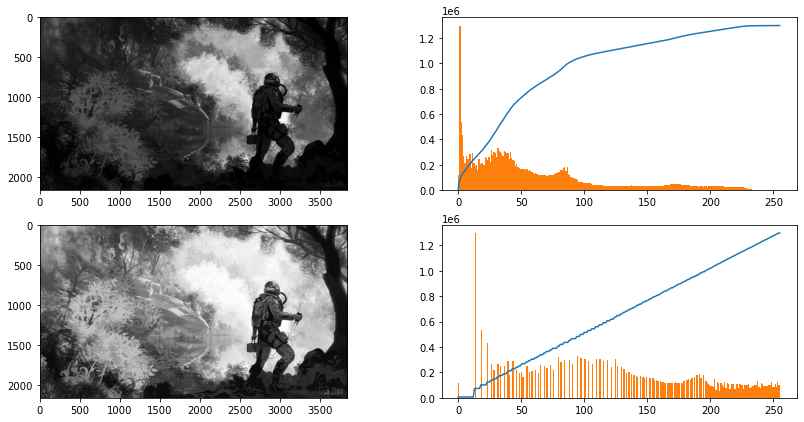

In [8]:
def cdf_calulation(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    
    return cdf,cdf_normalized

img = cv.cvtColor(cv.imread('Images/image 2.jpg',0),cv.COLOR_BGR2RGB)
cdf,cdf_normalized = cdf_calulation(img)

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_m = np.uint8(np.ma.filled(cdf_m,0))

img2 = cdf_m[img]
cdf2,cdf2_normalized = cdf_calulation(img2)

plt.figure(figsize=(14,7))
plt.subplot(221)
plt.imshow(img)

plt.subplot(222)
plt.plot(cdf_normalized)
plt.hist(img.flatten(),256,[0,256])

plt.subplot(223)
plt.imshow(img2)

plt.subplot(224)
plt.plot(cdf2_normalized)
plt.hist(img2.flatten(),256,[0,256])
plt.show()

# Using Library

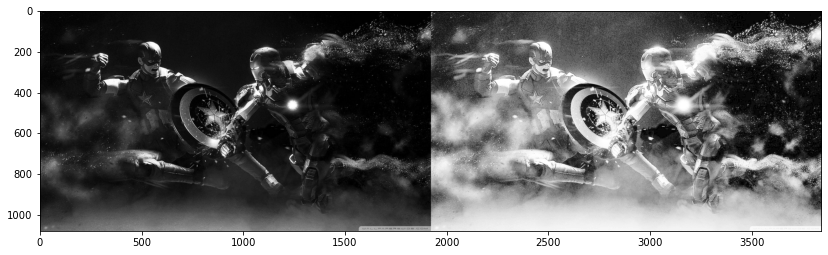

In [5]:
img = cv.imread('Images/image 1.jpg',0)
equ = cv.equalizeHist(img)

plt.figure(figsize=(14,7))
plt.imshow(np.hstack((img,equ)),'gray')
plt.show()

# Only for a Part

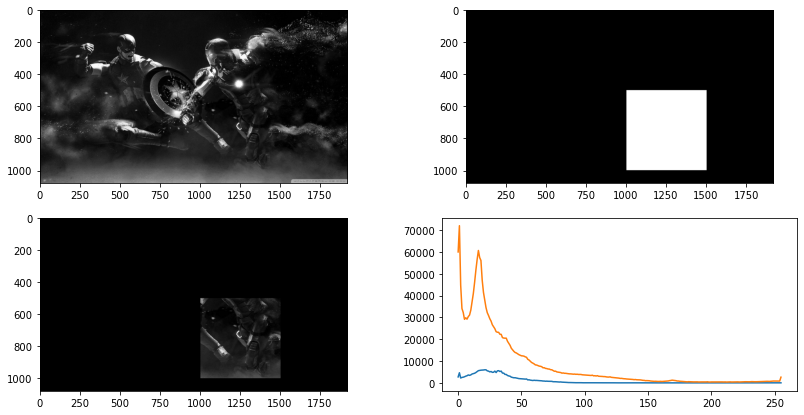

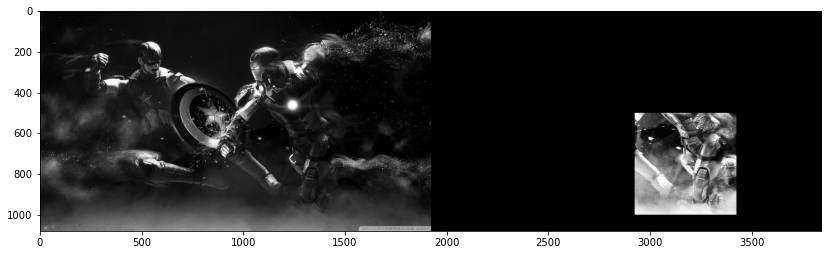

In [11]:
img = cv.imread('Images/image 1.jpg',0)

mask = np.zeros(img.shape[:2],dtype=np.uint8)
mask[500:1000,1000:1500] = 255

masked_img = cv.bitwise_and(img,img,mask=mask)

hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

equ = cv.equalizeHist(masked_img)

plt.figure(figsize=(14,7))
plt.subplot(221)
plt.imshow(img,'gray')

plt.subplot(222)
plt.imshow(mask,'gray')

plt.subplot(223)
plt.imshow(masked_img,'gray')

plt.subplot(224)
plt.plot(hist_mask)
plt.plot(hist_full)
plt.show()

plt.figure(figsize=(14,7))
plt.imshow(np.hstack((img,equ)),'gray')
plt.show()